# Fraud Detection API Testing

This notebook documents the testing and analysis of the `/predict` endpoint for the Financial Fraud Detection System. The Flask API, powered by a Random Forest model, processes transaction data to predict fraud. It includes visualizations to explore the dataset and evaluate model performance, enhancing understanding of the project.

## Setup and Data Loading

Load the dataset and trained model data (pkl file generated in Fraud_Model_Training notebook) for analysis.

In [2]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (ensure creditcard.csv is in the project folder)
data = pd.read_csv('creditcard.csv')
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data (mimicking train_model.py)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Load the trained model
model = joblib.load('fraud_model.pkl')

# Generate predictions for evaluation
y_pred = model.predict(X_test)

print("Dataset loaded and model predictions generated.")

Dataset loaded and model predictions generated.


## Visualizations

Explore the data and model performance with insightful visualizations.

### 1. Class Distribution

Visualize the imbalance between legitimate (0) and fraudulent (1) transactions.

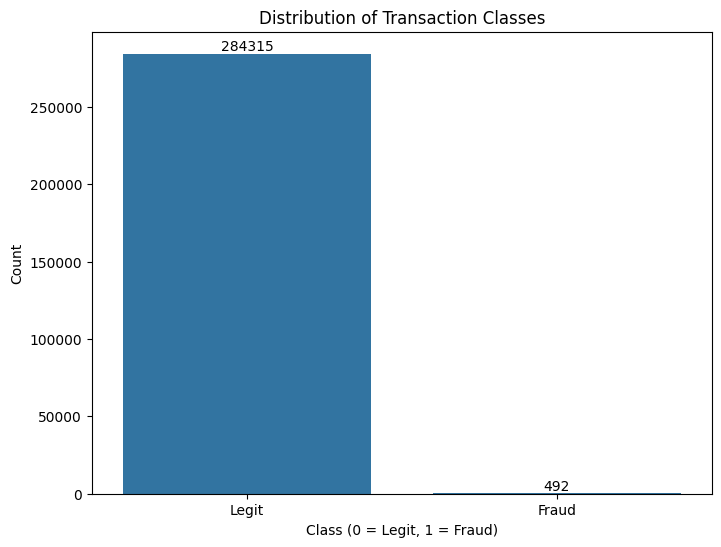

In [3]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Transaction Classes')
plt.xlabel('Class (0 = Legit, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legit', 'Fraud'])
for i, v in enumerate(data['Class'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

### 2. Confusion Matrix

Evaluate the model's performance with a confusion matrix.

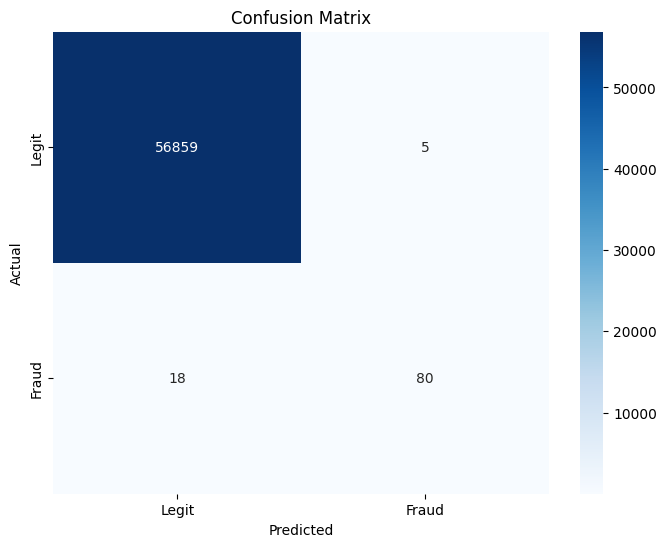

Confusion Matrix Statistics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [4]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Confusion Matrix Statistics:")
print(classification_report(y_test, y_pred))

### 3. Feature Importance

Highlight the most influential features in the Random Forest model.

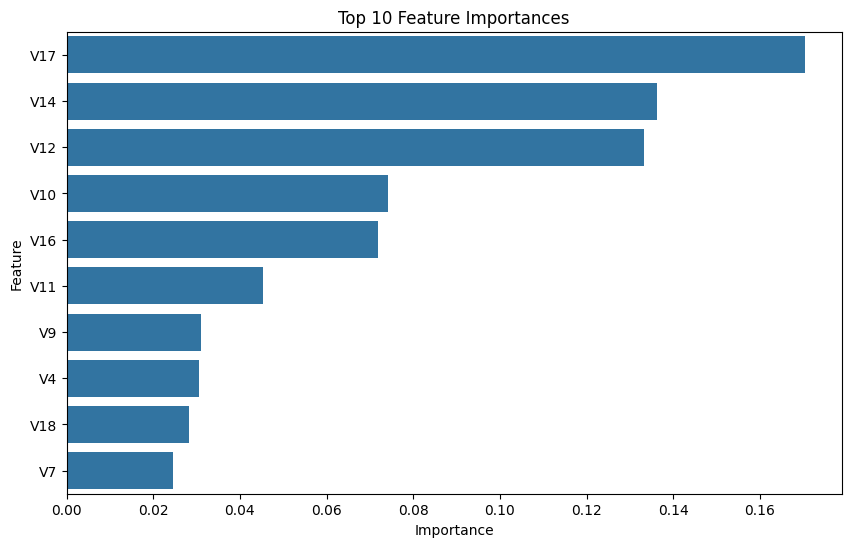

In [5]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Successful curl Test (Command Prompt)

The following command was executed in Command Prompt:

```bash
curl -X POST -H "Content-Type: application/json" -d "@test.json" http://localhost:5000/predict
```

**Output:** `{"prediction": "Legit"}`

**Note:** PowerShell may misparse this command; cmd is recommended for reliability.

## Python Test in Notebook

Below is the Python equivalent to test the API interactively.

In [6]:
import requests

# Load test data
with open('test.json', 'r') as f:
    data = f.read()

# Send POST request to /predict
response = requests.post('http://localhost:5000/predict', headers={'Content-Type': 'application/json'}, data=data)

# Display result
print(response.text)

{
  "prediction": "Legit"
}



**Expected Output:** `{"prediction": "Legit"}`

Run the cell above while the Flask app (`python app.py`) is active to verify.

## Observations

- The API successfully processes the `test.json` input, matching the model’s training data structure.
- Visualizations reveal the dataset’s imbalance, model accuracy, and key predictive features.
- The cmd `curl` test highlights the importance of shell environment compatibility.
- This setup is ready for portfolio presentation or further enhancements (e.g., Dockerization).

## Explanation of Visualizations
### Class Distribution:
**Purpose**: Shows the severe imbalance between legit (0) and fraud (1) transactions, educating viewers on the dataset challenge.

**Insight**: Highlights why techniques like stratification (used in train_test_split) are critical.

### Confusion Matrix:
**Purpose**: Displays true vs. predicted labels, providing a clear view of model performance (e.g., precision, recall for fraud detection).

**Insight**: Helps assess how well the model catches fraud cases, a key metric for this application.

### Feature Importance:
**Purpose**: Identifies the top 10 features influencing the Random Forest model, offering insight into what drives predictions.

**Insight**: Educates on feature engineering and model interpretability, showcasing your analytical depth.

